<a href="https://colab.research.google.com/github/PhanTruong-Thinh/Data-Augmentation/blob/main/cnn_flower_image_classification_data_augmentations_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h3 style='color:purple'>Train test split</h3>

In [2]:
from sklearn.model_selection import train_test_split
from keras import Sequential, datasets, Model, layers
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [3]:
X_train_scaled = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test_scaled = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [29]:

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 4ms/step - loss: 3.1058 - accuracy: 0.3432
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.7749 - accuracy: 0.4327
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6640 - accuracy: 0.4625
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5914 - accuracy: 0.4818
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5389 - accuracy: 0.4947
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4980 - accuracy: 0.5051
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4678 - accuracy: 0.5113
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4324 - accuracy: 0.5196
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4048 - accuracy: 0.5250
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.385

In [30]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.7182 - accuracy: 0.4922


[2.7181804180145264, 0.49219998717308044]

In [16]:
predictions = model.predict(X_test_scaled)
predictions

313/313 [==============================] - 1s 2ms/step


array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 13.261097 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.5341036, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 16.850548 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  5.053712 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [24]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

  ]
)

**Original Image**

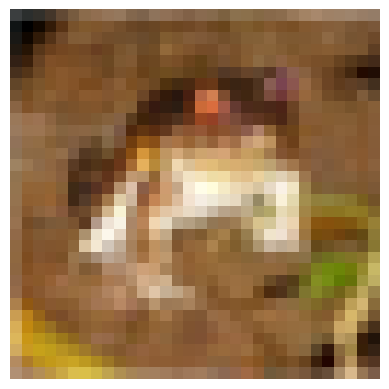

In [25]:
plt.axis('off')
plt.imshow(X_train[0])

**Newly generated training sample using data augmentation**

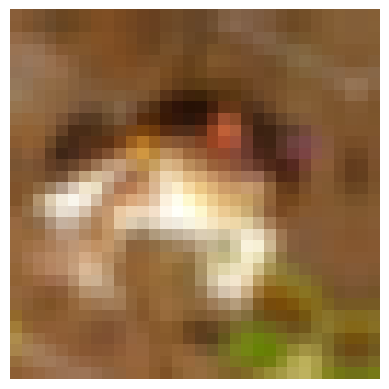

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [27]:

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 12s 6ms/step - loss: 2.4144 - accuracy: 0.2902
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1753 - accuracy: 0.3693
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0988 - accuracy: 0.3952
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0369 - accuracy: 0.4156
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9902 - accuracy: 0.4324
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9491 - accuracy: 0.4469
Epoch 7/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9123 - accuracy: 0.4584
Epoch 8/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8850 - accuracy: 0.4655
Epoch 9/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8567 - accuracy: 0.4757
Epoch 10/30
1563/1563 [==============================] - 9s 6ms/step - loss:

In [28]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5598 - accuracy: 0.5747


[1.5598304271697998, 0.5746999979019165]